# My Final Assignment : Segmenting and Clustering Districts in Seoul

필요한 라이브러리 준비
- numpy
- pandas
- json
- requests
- matplotlib
- sklearn.cluster
- folium

In [10]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### 1. Download and Explore Dataset

Read excel data from Seoul Open Dataset website.

In [11]:
df_seoul = pd.read_excel('Seoul_District_Data.xlsx', index_col=0)
df_seoul.head(15)

,Latitude,Longitude,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House
District,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Gangnam-gu,37.504606,127.049230,228775,547453,4758,120.455696,39.50,7720,1.410167,68.37,2559,0.467437,231,40,33,18,6,5,9,0,3,2,1,1744,502,769,176654,4.209924,75.360309,3.456474,15.919255,7437,133127,6106,28122
Gangdong-gu,37.550787,127.143853,177247,431920,1493,60.715738,24.59,4261,0.986525,74.34,761,0.176190,284,35,27,12,6,4,6,0,1,2,1,631,38,774,119824,9.468053,65.677160,3.091200,20.768794,11345,78697,3704,24886
Gangbuk-gu,37.626180,127.026008,143395,322915,946,40.084746,23.60,3393,1.050741,78.14,447,0.138427,174,23,14,8,5,2,2,1,1,1,0,203,24,159,91806,21.123892,35.565214,5.287236,36.838551,19393,32651,4854,33820
Gangseo-gu,37.556245,126.851900,258503,603611,1202,29.005792,41.44,5135,0.850713,78.94,777,0.128725,441,56,36,16,6,3,11,1,0,5,2,673,40,503,179045,6.518473,59.931302,2.963501,29.919294,11671,107304,5306,53569
Gwanak-gu,37.481245,126.952497,262222,520040,3223,108.995604,29.57,5525,1.062418,81.35,673,0.129413,280,36,22,12,4,4,7,1,0,4,1,366,89,521,121277,19.095954,43.917643,5.350561,30.043619,23159,53262,6489,36436
Gwangjin-gu,37.536871,127.083635,162606,371063,1228,71.981243,17.06,4646,1.252078,81.73,543,0.146336,214,36,22,9,3,2,4,1,0,0,2,383,59,231,79393,21.455292,37.635560,5.584875,33.455090,17034,29880,4434,26561
Guro-gu,37.503037,126.881908,172457,438486,2746,136.481113,20.12,4895,1.116341,78.87,557,0.127028,341,34,24,12,1,4,2,2,0,4,1,367,64,260,118047,10.562742,63.190085,6.236499,19.299940,12469,74594,7362,22783
Geumcheon-gu,37.466727,126.894271,107971,254021,1526,117.204301,13.02,3265,1.285327,81.56,330,0.129911,174,18,18,7,2,1,2,1,0,1,0,180,35,104,57096,17.122040,47.887768,6.895404,27.233081,9776,27342,3937,15549
Nowon-gu,37.655005,127.060317,217655,548160,1576,44.469526,35.44,4209,0.767842,80.53,717,0.130801,478,68,42,21,5,4,12,1,0,7,0,728,47,668,186626,4.363272,86.121441,1.894698,7.218180,8143,160725,3536,13471


Get Seoul geojson file

* https://github.com/southkorea/seoul-maps/blob/master/juso/2015/json/seoul_municipalities_geo_simple.json


In [12]:
geo_path = 'seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [13]:
# Get the latitude and longitude of Seoul using geolocator. 
address = 'Seoul'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seoul are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seoul are 37.5666791, 126.9782914.


In [14]:
# create map of Seoul using latitude and longitude values
map_seoul = folium.Map(location=[latitude, longitude], zoom_start=11) 
    
map_seoul

In [15]:
# add markers to map
for lat, lng, district in zip(df_seoul['Latitude'], df_seoul['Longitude'], df_seoul.index):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seoul) 

map_seoul

In [16]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.0.2


In [18]:
df_seoul.reset_index(inplace=True)
df_seoul[['District','Number_of_Crimes']].head()

,District,Number_of_Crimes
0,Gangnam-gu,7720
1,Gangdong-gu,4261
2,Gangbuk-gu,3393
3,Gangseo-gu,5135
4,Gwanak-gu,5525


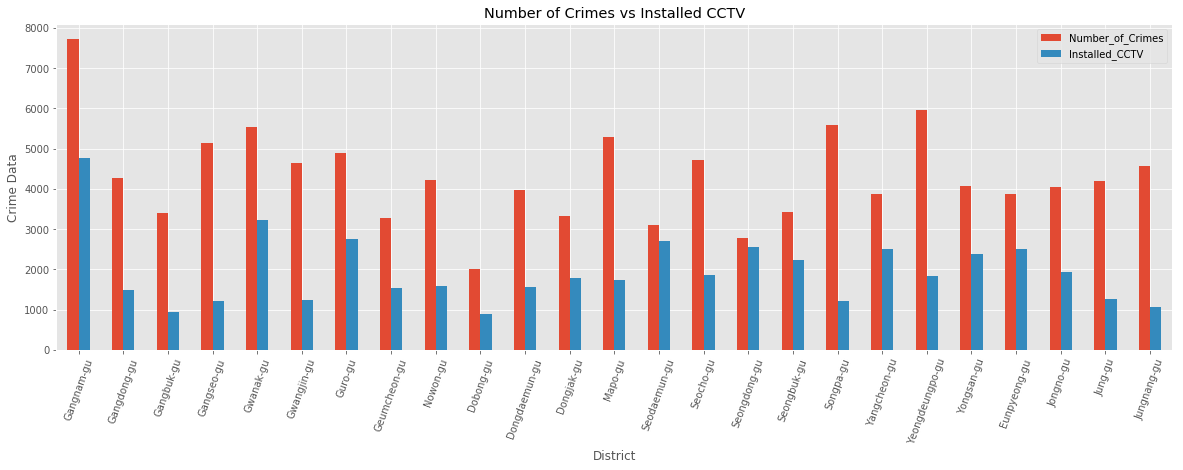

In [19]:
# Plot data
df_seoul[['District','Number_of_Crimes', 'Installed_CCTV']].plot(kind='bar', figsize=(20, 6))

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Crime Data') # add y-label to the plot
plt.title('Number of Crimes vs Installed CCTV') # add title to the plot
plt.xticks(np.arange(len(df_seoul['District'])), df_seoul['District'], rotation=70)

plt.show()

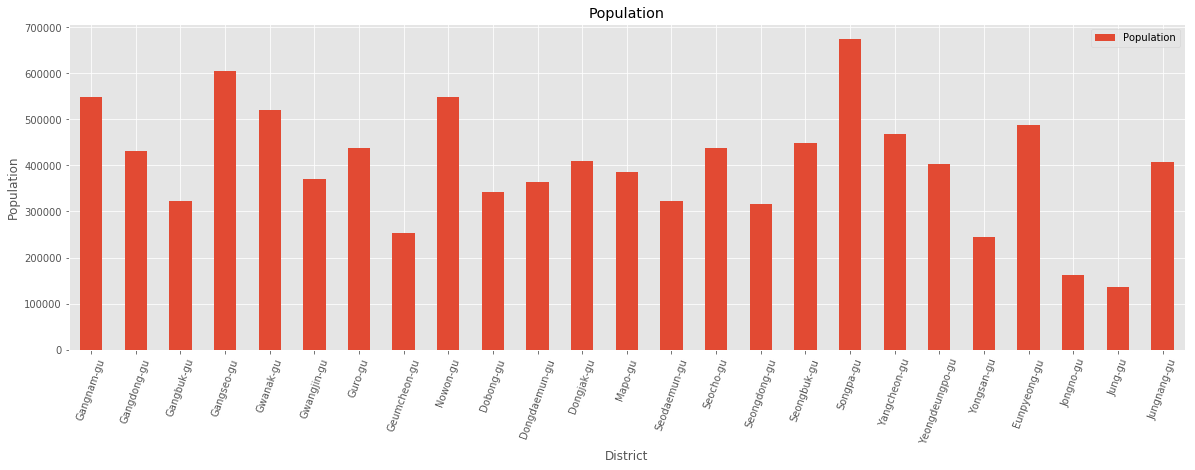

In [20]:
# Plot data
df_seoul[['District','Population']].plot(kind='bar', figsize=(20, 6))

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population') # add title to the plot
plt.xticks(np.arange(len(df_seoul['District'])), df_seoul['District'], rotation=70)

plt.show()

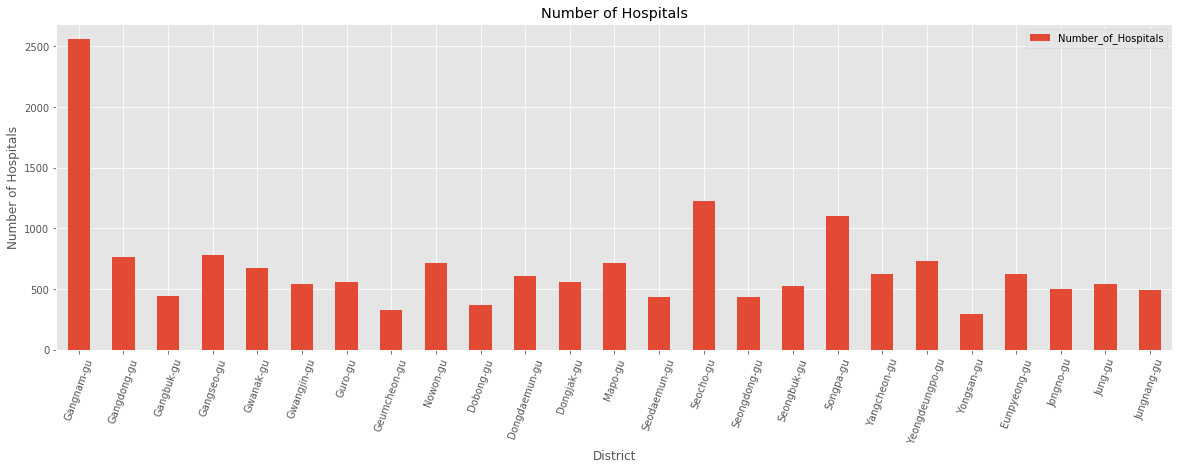

In [21]:
# Plot data
df_seoul[['District','Number_of_Hospitals']].plot(kind='bar', figsize=(20, 6))

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Number of Hospitals') # add y-label to the plot
plt.title('Number of Hospitals') # add title to the plot
plt.xticks(np.arange(len(df_seoul['District'])), df_seoul['District'], rotation=70)

plt.show()

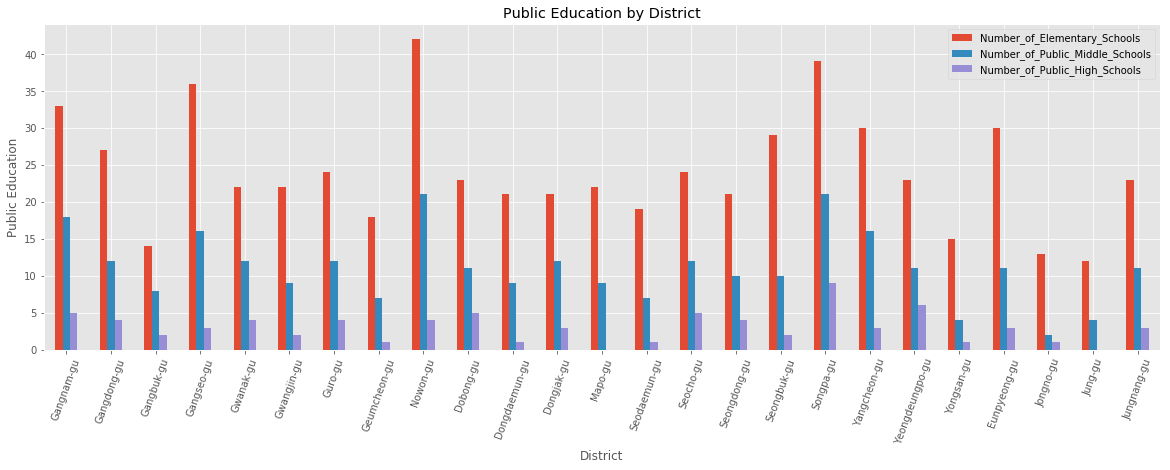

In [22]:
# Plot data
df_seoul[['District', 'Number_of_Elementary_Schools', 'Number_of_Public_Middle_Schools', 'Number_of_Public_High_Schools']].plot(kind='bar', figsize=(20, 6))

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Public Education') # add y-label to the plot
plt.title('Public Education by District') # add title to the plot
plt.xticks(np.arange(len(df_seoul['District'])), df_seoul['District'], rotation=70)

plt.show()

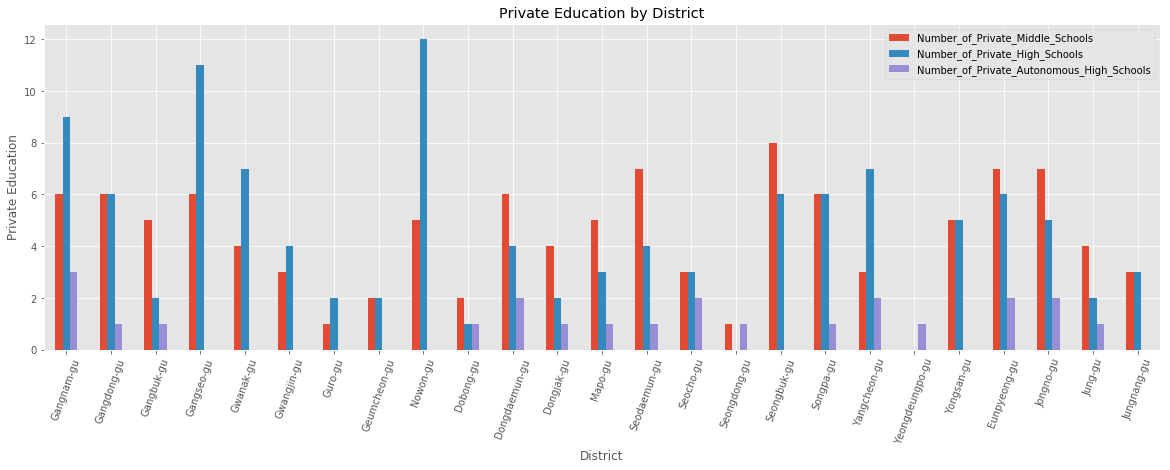

In [23]:
# Plot data
df_seoul[['District', 'Number_of_Private_Middle_Schools', 'Number_of_Private_High_Schools', 'Number_of_Private_Autonomous_High_Schools']].plot(kind='bar', figsize=(20, 6))

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Private Education') # add y-label to the plot
plt.title('Private Education by District') # add title to the plot
plt.xticks(np.arange(len(df_seoul['District'])), df_seoul['District'], rotation=70)

plt.show()

In [24]:
# Prepare for calling FourSquare API
CLIENT_ID = 'D1MRYKFKZXPS0ESBYQILBTP0DVHSF3NKIPJG4MJFBCGNJDQ5' # your Foursquare ID
CLIENT_SECRET = 'BBT52MYQYCYS4NPEOQNQZJZFCCKFOK3MCNRDGVDBM3LJYXU4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D1MRYKFKZXPS0ESBYQILBTP0DVHSF3NKIPJG4MJFBCGNJDQ5
CLIENT_SECRET:BBT52MYQYCYS4NPEOQNQZJZFCCKFOK3MCNRDGVDBM3LJYXU4


첫번째 레코드인 강남구의 자치구 이름, 위도, 경도의 값을 가져옵니다.

In [25]:
# Retreive first record data (District's name, latitude and longitude) 
district_latitude = df_seoul['Latitude'][0]  # 자치구의 위도
district_longitude = df_seoul['Longitude'][0]  # 자치구의 경도
district_name = df_seoul['District'][0]

print('Latitude and longitude values of {} are {}, {}.'.format(district_name, district_latitude, district_longitude))

Latitude and longitude values of Gangnam-gu are 37.504606, 127.04923.


In [26]:
# Check data status
df_seoul.head()

,District,Latitude,Longitude,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House
0,Gangnam-gu,37.504606,127.049230,228775,547453,4758,120.455696,39.50,7720,1.410167,68.37,2559,0.467437,231,40,33,18,6,5,9,0,3,2,1,1744,502,769,176654,4.209924,75.360309,3.456474,15.919255,7437,133127,6106,28122
1,Gangdong-gu,37.550787,127.143853,177247,431920,1493,60.715738,24.59,4261,0.986525,74.34,761,0.176190,284,35,27,12,6,4,6,0,1,2,1,631,38,774,119824,9.468053,65.677160,3.091200,20.768794,11345,78697,3704,24886
2,Gangbuk-gu,37.626180,127.026008,143395,322915,946,40.084746,23.60,3393,1.050741,78.14,447,0.138427,174,23,14,8,5,2,2,1,1,1,0,203,24,159,91806,21.123892,35.565214,5.287236,36.838551,19393,32651,4854,33820
3,Gangseo-gu,37.556245,126.851900,258503,603611,1202,29.005792,41.44,5135,0.850713,78.94,777,0.128725,441,56,36,16,6,3,11,1,0,5,2,673,40,503,179045,6.518473,59.931302,2.963501,29.919294,11671,107304,5306,53569
4,Gwanak-gu,37.481245,126.952497,262222,520040,3223,108.995604,29.57,5525,1.062418,81.35,673,0.129413,280,36,22,12,4,4,7,1,0,4,1,366,89,521,121277,19.095954,43.917643,5.350561,30.043619,23159,53262,6489,36436


In [27]:
# Create URL data to get Gangnam-gu's recommended venue list using FourSquare API

LIMIT = 3 # limit of number of venues returned by Foursquare API
near = 'Gangnam-gu'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    near,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=D1MRYKFKZXPS0ESBYQILBTP0DVHSF3NKIPJG4MJFBCGNJDQ5&client_secret=BBT52MYQYCYS4NPEOQNQZJZFCCKFOK3MCNRDGVDBM3LJYXU4&v=20180605&near=Gangnam-gu&limit=3'

In [28]:
# Call FourSquare API and get results
results = requests.get(url).json()
results.get('response').get('groups')

[{'type': 'Recommended Places',
  'name': 'recommended',
  'items': [{'reasons': {'count': 0,
     'items': [{'summary': 'This spot is popular',
       'type': 'general',
       'reasonName': 'globalInteractionReason'}]},
    'venue': {'id': '4b7f470ef964a5206c2430e3',
     'name': '산월수제비',
     'location': {'address': '강남구 삼성로 212',
      'crossStreet': '은마상가 지하1층',
      'lat': 37.495130210442255,
      'lng': 127.06397828871087,
      'labeledLatLngs': [{'label': 'display',
        'lat': 37.495130210442255,
        'lng': 127.06397828871087}],
      'cc': 'KR',
      'neighborhood': '대치2동',
      'city': '서울특별시',
      'state': '서울특별시',
      'country': '대한민국',
      'formattedAddress': ['강남구 삼성로 212 (은마상가 지하1층)',
       '대치2동',
       '서울특별시',
       '서울특별시',
       '대한민국']},
     'categories': [{'id': '4bf58dd8d48988d113941735',
       'name': 'Korean Restaurant',
       'pluralName': 'Korean Restaurants',
       'shortName': 'Korean',
       'icon': {'prefix': 'https://ss3.4sqi.

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,산월수제비,Korean Restaurant,37.495130,127.063978
1,김영모 과자점,Bakery,37.493606,127.060960
2,만나분식,Bunsik Restaurant,37.495850,127.062806


In [31]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


In [32]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    LIMIT=30
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
#        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}'.format(
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat,
            lng,
            1000,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude',
                  'District Longitude',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
seoul_venues = getNearbyVenues(names=df_seoul['District'], latitudes=df_seoul['Latitude'], longitudes=df_seoul['Longitude'])

Gangnam-gu
Gangdong-gu
Gangbuk-gu
Gangseo-gu
Gwanak-gu
Gwangjin-gu
Guro-gu
Geumcheon-gu
Nowon-gu
Dobong-gu
Dongdaemun-gu
Dongjak-gu
Mapo-gu
Seodaemun-gu
Seocho-gu
Seongdong-gu
Seongbuk-gu
Songpa-gu
Yangcheon-gu
Yeongdeungpo-gu
Yongsan-gu
Eunpyeong-gu
Jongno-gu
Jung-gu
Jungnang-gu


In [34]:
print(seoul_venues.shape)
seoul_venues.head()

(684, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gangnam-gu,37.504606,127.04923,최인아책방,37.505994,127.048226,Bookstore
1,Gangnam-gu,37.504606,127.04923,김돈이,37.506007,127.049455,BBQ Joint
2,Gangnam-gu,37.504606,127.04923,농민백암순대,37.503792,127.053072,Korean Restaurant
3,Gangnam-gu,37.504606,127.04923,뽕나무쟁이족발,37.503248,127.052068,Bossam/Jokbal Restaurant
4,Gangnam-gu,37.504606,127.04923,Starbucks,37.504053,127.048548,Coffee Shop


In [35]:
seoul_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Dobong-gu,27,27,27,27,27,27
Dongdaemun-gu,30,30,30,30,30,30
Dongjak-gu,30,30,30,30,30,30
Eunpyeong-gu,23,23,23,23,23,23
Gangbuk-gu,18,18,18,18,18,18
Gangdong-gu,28,28,28,28,28,28
Gangnam-gu,30,30,30,30,30,30
Gangseo-gu,30,30,30,30,30,30
Geumcheon-gu,18,18,18,18,18,18


In [36]:
print('There are {} uniques categories.'.format(len(seoul_venues['Venue Category'].unique())))

There are 114 uniques categories.


In [37]:
seoul_venues.head(10)

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gangnam-gu,37.504606,127.04923,최인아책방,37.505994,127.048226,Bookstore
1,Gangnam-gu,37.504606,127.04923,김돈이,37.506007,127.049455,BBQ Joint
2,Gangnam-gu,37.504606,127.04923,농민백암순대,37.503792,127.053072,Korean Restaurant
3,Gangnam-gu,37.504606,127.04923,뽕나무쟁이족발,37.503248,127.052068,Bossam/Jokbal Restaurant
4,Gangnam-gu,37.504606,127.04923,Starbucks,37.504053,127.048548,Coffee Shop
5,Gangnam-gu,37.504606,127.04923,경천애인 2237,37.505839,127.052863,Korean Restaurant
6,Gangnam-gu,37.504606,127.04923,우리집만두,37.502797,127.049812,Dumpling Restaurant
7,Gangnam-gu,37.504606,127.04923,스시산원,37.506823,127.050828,Sushi Restaurant
8,Gangnam-gu,37.504606,127.04923,참치그라,37.504891,127.046961,Seafood Restaurant
9,Gangnam-gu,37.504606,127.04923,돈그리아,37.502949,127.050547,Korean Restaurant


In [38]:
# Data Transformation
seoul_venues.replace(['Korean Restaurant', 'Bunsik Restaurant', 'Seafood Restaurant', 'Japanese Restaurant', 
                      'Gukbap Restaurant', 'Italian Restaurant', 'Vietnamese Restaurant', 'Udon Restaurant',
                      'Fast Food Restaurant', 'Indian Restaurant', 'Latin American Restaurant', 'Ramen Restaurant',
                      'American Restaurant', 'Chinese Restaurant', 'Japanese Curry Restaurant', 'Vegetarian / Vegan Restaurant',
                      'Soba Restaurant', 'Dumpling Restaurant', 'Sushi Restaurant', 'French Restaurant', 'Noodle House',
                      'Bossam/Jokbal Restaurant', 'Middle Eastern Restaurant', 'Asian Restaurant', 'Tapas Restaurant','Steakhouse',
                      'Mexican Restaurant', 'German Restaurant', 'Sandwich Place', 'Food', 'Bagel Shop', 'Donut Shop',
                      'Burger Joint', 'Snack Place', 'Buffet', 'Bistro', 'Taco Place', 'Breakfast Spot', 'BBQ Joint', 'Food Court',
                      'Thai Restaurant', 'Szechuan Restaurant', 'Shabu-Shabu Restaurant'], 'Restaurant', inplace=True)
seoul_venues.replace(['Shopping Plaza', 'Shopping Mall', 'Department Store', 'Outlet Store', 'Plaza'], 'Shopping Mall', inplace=True)
seoul_venues.replace(['Coffee Shop', 'Café', 'Bubble Tea Shop', 'Tea Room'], 'Cafe', inplace=True)
seoul_venues.replace(['History Museum', 'Science Museum', ], 'Museum', inplace=True)
seoul_venues.replace(['Wine Bar', 'Hotel Bar', 'Sake Bar', 'Dive Bar', 'Jazz Club', 'Cocktail Bar', 'Beer Bar', 'Beer Garden'], 'Bar', inplace=True)
seoul_venues.replace(['Camera Store', 'Big Box Store', 'Used Bookstore', 'Bookstore', 'Gift Shop', 'Clothing Store', 'Supermarket', 
                      'Warehouse Store', 'Electronics Store', 'Sporting Goods Shop', 'Grocery Store', 'Farmers Market', 'Jewelry Store'], 'Store', inplace=True)
seoul_venues.replace(['Pastry Shop'], 'Bakery', inplace=True)
seoul_venues.replace(['Gym / Fitness Center'], 'Gym', inplace=True)
seoul_venues.replace(['Indie Movie Theater', 'Multiplex', 'Movie Theater'], 'Theater', inplace=True)
seoul_venues.replace(['Palace', 'Monument / Landmark'], 'Landmark', inplace=True)
seoul_venues.replace(['Brewery'], 'Pub', inplace=True)
seoul_venues.replace(['Ice Cream Shop'], 'Dessert Shop', inplace=True)
seoul_venues.replace(['Bike Trail'], 'Trail', inplace=True)
seoul_venues.replace(['Bed & Breakfast', 'Hostel', 'Hotel'], 'Hotel/Hostel', inplace=True)
seoul_venues.replace(['Auto Workshop'], 'Auto Dealership', inplace=True)
seoul_venues.replace(['Light Rail Station'], 'Train Station', inplace=True)
seoul_venues.replace(['Baseball Field'], 'Baseball Stadium', inplace=True)
seoul_venues.replace(['Historic Site'], 'Landmark', inplace=True)

In [39]:
seoul_venues['Venue Category'].unique()

array(['Store', 'Restaurant', 'Cafe', 'Park', 'Salad Place', 'Bar',
       'Theater', 'Dessert Shop', 'Bakery', 'Shopping Mall', 'Bus Stop',
       'Market', 'Auto Dealership', 'Train Station', 'Intersection',
       'Mountain', 'Hotel/Hostel', 'Spa', 'Gym', 'College Auditorium',
       'Arcade', 'Pool', 'Pub', 'Lounge', 'Toy / Game Store', 'Trail',
       'Lottery Retailer', 'Cosmetics Shop', 'Performing Arts Venue',
       'Pizza Place', 'Bowling Alley', 'Metro Station', 'Tunnel',
       'Playground', 'Bath House', 'Fried Chicken Joint',
       'Convention Center', 'Golf Course', 'Janguh Restaurant',
       'Dance Studio', 'Landmark', 'Skating Rink', 'Fish Market',
       'Organic Grocery', 'Water Park', 'Art Gallery', 'Church', 'Museum',
       'Food & Drink Shop', 'Temple', 'Outdoor Sculpture'], dtype=object)

In [40]:
# one hot encoding
seoul_onehot = pd.get_dummies(seoul_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seoul_onehot['District'] = seoul_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [seoul_onehot.columns[-1]] + list(seoul_onehot.columns[:-1])
seoul_onehot = seoul_onehot[fixed_columns]

seoul_onehot.head()

,District,Arcade,Art Gallery,Auto Dealership,Bakery,Bar,Bath House,Bowling Alley,Bus Stop,Cafe,Church,College Auditorium,Convention Center,Cosmetics Shop,Dance Studio,Dessert Shop,Fish Market,Food & Drink Shop,Fried Chicken Joint,Golf Course,Gym,Hotel/Hostel,Intersection,Janguh Restaurant,Landmark,Lottery Retailer,Lounge,Market,Metro Station,Mountain,Museum,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pizza Place,Playground,Pool,Pub,Restaurant,Salad Place,Shopping Mall,Skating Rink,Spa,Store,Temple,Theater,Toy / Game Store,Trail,Train Station,Tunnel,Water Park
0,Gangnam-gu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Gangnam-gu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Gangnam-gu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Gangnam-gu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Gangnam-gu,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
seoul_onehot.shape

(684, 52)

In [42]:
seoul_grouped = seoul_onehot.groupby('District').mean().reset_index()
seoul_grouped

,District,Arcade,Art Gallery,Auto Dealership,Bakery,Bar,Bath House,Bowling Alley,Bus Stop,Cafe,Church,College Auditorium,Convention Center,Cosmetics Shop,Dance Studio,Dessert Shop,Fish Market,Food & Drink Shop,Fried Chicken Joint,Golf Course,Gym,Hotel/Hostel,Intersection,Janguh Restaurant,Landmark,Lottery Retailer,Lounge,Market,Metro Station,Mountain,Museum,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pizza Place,Playground,Pool,Pub,Restaurant,Salad Place,Shopping Mall,Skating Rink,Spa,Store,Temple,Theater,Toy / Game Store,Trail,Train Station,Tunnel,Water Park
0,Dobong-gu,0.000000,0.000000,0.000000,0.148148,0.000000,0.000000,0.037037,0.037037,0.074074,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.111111,0.000000,0.000000,0.000000,0.296296,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dongdaemun-gu,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.366667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.433333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Dongjak-gu,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000
3,Eunpyeong-gu,0.000000,0.000000,0.000000,0.173913,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434783,0.000000,0.043478,0.000000,0.000000,0.086957,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000
4,Gangbuk-gu,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.055556,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000
5,Gangdong-gu,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.035714,0.321429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321429,0.000000,0.035714,0.000000,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000
6,Gangnam-gu,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.766667,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Gangseo-gu,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000

In [43]:
seoul_grouped.shape

(25, 52)

In [44]:
num_top_venues = 5

for hood in seoul_grouped['District']:
    print("----"+hood[0]+"----")
    temp = seoul_grouped[seoul_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----D----
          venue  freq
0    Restaurant  0.30
1        Bakery  0.15
2   Pizza Place  0.11
3  Dessert Shop  0.07
4          Cafe  0.07


----D----
          venue  freq
0    Restaurant  0.43
1          Cafe  0.37
2        Bakery  0.10
3  Dessert Shop  0.07
4  Hotel/Hostel  0.03


----D----
                 venue  freq
0           Restaurant  0.50
1                 Cafe  0.13
2         Dessert Shop  0.07
3               Tunnel  0.07
4  Fried Chicken Joint  0.03


----E----
           venue  freq
0     Restaurant  0.43
1         Bakery  0.17
2   Hotel/Hostel  0.09
3          Store  0.09
4  Shopping Mall  0.04


----G----
          venue  freq
0          Cafe  0.22
1    Restaurant  0.17
2      Bus Stop  0.06
3  Hotel/Hostel  0.06
4  Intersection  0.06


----G----
          venue  freq
0          Cafe  0.32
1    Restaurant  0.32
2        Bakery  0.14
3  Dessert Shop  0.07
4         Store  0.04


----G----
        venue  freq
0  Restaurant  0.77
1        Cafe  0.10
2         Bar  0.0

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = seoul_grouped['District']

for ind in np.arange(seoul_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seoul_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dobong-gu,Restaurant,Bakery,Pizza Place,Metro Station,Dessert Shop,Cafe,Bowling Alley,Bus Stop,Performing Arts Venue,Store
1,Dongdaemun-gu,Restaurant,Cafe,Bakery,Dessert Shop,Hotel/Hostel,Water Park,Dance Studio,Janguh Restaurant,Intersection,Gym
2,Dongjak-gu,Restaurant,Cafe,Tunnel,Dessert Shop,Bus Stop,Park,Playground,Fried Chicken Joint,Pizza Place,Bath House
3,Eunpyeong-gu,Restaurant,Bakery,Hotel/Hostel,Store,Museum,Dessert Shop,Theater,Cafe,Shopping Mall,Water Park
4,Gangbuk-gu,Cafe,Restaurant,Hotel/Hostel,Market,Intersection,Mountain,Bus Stop,Park,Dessert Shop,Store


In [47]:
df_seoul.head()

,District,Latitude,Longitude,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House
0,Gangnam-gu,37.504606,127.049230,228775,547453,4758,120.455696,39.50,7720,1.410167,68.37,2559,0.467437,231,40,33,18,6,5,9,0,3,2,1,1744,502,769,176654,4.209924,75.360309,3.456474,15.919255,7437,133127,6106,28122
1,Gangdong-gu,37.550787,127.143853,177247,431920,1493,60.715738,24.59,4261,0.986525,74.34,761,0.176190,284,35,27,12,6,4,6,0,1,2,1,631,38,774,119824,9.468053,65.677160,3.091200,20.768794,11345,78697,3704,24886
2,Gangbuk-gu,37.626180,127.026008,143395,322915,946,40.084746,23.60,3393,1.050741,78.14,447,0.138427,174,23,14,8,5,2,2,1,1,1,0,203,24,159,91806,21.123892,35.565214,5.287236,36.838551,19393,32651,4854,33820
3,Gangseo-gu,37.556245,126.851900,258503,603611,1202,29.005792,41.44,5135,0.850713,78.94,777,0.128725,441,56,36,16,6,3,11,1,0,5,2,673,40,503,179045,6.518473,59.931302,2.963501,29.919294,11671,107304,5306,53569
4,Gwanak-gu,37.481245,126.952497,262222,520040,3223,108.995604,29.57,5525,1.062418,81.35,673,0.129413,280,36,22,12,4,4,7,1,0,4,1,366,89,521,121277,19.095954,43.917643,5.350561,30.043619,23159,53262,6489,36436


In [48]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_not_normalize = ['District', 'Latitude', 'Longitude']
column_names_to_normalize = [x for x in list(df_seoul) if x not in column_names_to_not_normalize ]
x = df_seoul[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_seoul.index)
df_seoul_normalized = df_seoul.copy()
df_seoul_normalized[column_names_to_normalize] = df_temp
df_seoul.head()

,District,Latitude,Longitude,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House
0,Gangnam-gu,37.504606,127.049230,228775,547453,4758,120.455696,39.50,7720,1.410167,68.37,2559,0.467437,231,40,33,18,6,5,9,0,3,2,1,1744,502,769,176654,4.209924,75.360309,3.456474,15.919255,7437,133127,6106,28122
1,Gangdong-gu,37.550787,127.143853,177247,431920,1493,60.715738,24.59,4261,0.986525,74.34,761,0.176190,284,35,27,12,6,4,6,0,1,2,1,631,38,774,119824,9.468053,65.677160,3.091200,20.768794,11345,78697,3704,24886
2,Gangbuk-gu,37.626180,127.026008,143395,322915,946,40.084746,23.60,3393,1.050741,78.14,447,0.138427,174,23,14,8,5,2,2,1,1,1,0,203,24,159,91806,21.123892,35.565214,5.287236,36.838551,19393,32651,4854,33820
3,Gangseo-gu,37.556245,126.851900,258503,603611,1202,29.005792,41.44,5135,0.850713,78.94,777,0.128725,441,56,36,16,6,3,11,1,0,5,2,673,40,503,179045,6.518473,59.931302,2.963501,29.919294,11671,107304,5306,53569
4,Gwanak-gu,37.481245,126.952497,262222,520040,3223,108.995604,29.57,5525,1.062418,81.35,673,0.129413,280,36,22,12,4,4,7,1,0,4,1,366,89,521,121277,19.095954,43.917643,5.350561,30.043619,23159,53262,6489,36436


In [49]:
df_seoul_normalized.head()

,District,Latitude,Longitude,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House
0,Gangnam-gu,37.504606,127.049230,0.798958,0.765644,1.000000,0.734975,0.797732,1.000000,0.330066,0.000000,1.000000,1.000000,0.399027,0.481481,0.700000,0.842105,0.750,0.555556,0.750000,0.0,1.000000,0.285714,0.5,1.000000,1.000000,0.938287,0.930619,0.000000,0.812195,0.170257,0.230687,0.048255,0.813745,0.783448,0.386112
1,Gangdong-gu,37.550787,127.143853,0.552841,0.550848,0.153926,0.254850,0.395085,0.395385,0.160589,0.446856,0.204777,0.191018,0.527981,0.388889,0.500000,0.526316,0.750,0.444444,0.500000,0.0,0.333333,0.285714,0.5,0.337500,0.047228,0.944584,0.550618,0.203194,0.643203,0.136323,0.359261,0.236647,0.446404,0.369310,0.329251
2,Gangbuk-gu,37.626180,127.026008,0.391151,0.348189,0.012179,0.089041,0.368350,0.243664,0.186278,0.731287,0.065900,0.086125,0.260341,0.166667,0.066667,0.315789,0.625,0.222222,0.166667,0.5,0.333333,0.142857,0.0,0.082738,0.018480,0.170025,0.363272,0.653621,0.117683,0.340334,0.785310,0.624614,0.135645,0.567586,0.486233
3,Gangseo-gu,37.556245,126.851900,0.940950,0.870051,0.078518,0.000000,0.850122,0.548156,0.106257,0.791168,0.211853,0.059178,0.909976,0.777778,0.800000,0.736842,0.750,0.333333,0.916667,0.5,0.000000,0.714286,1.0,0.362500,0.051335,0.603275,0.946607,0.089211,0.542925,0.124459,0.601864,0.252362,0.639469,0.645517,0.833248
4,Gwanak-gu,37.481245,126.952497,0.958713,0.714679,0.602229,0.642871,0.529571,0.616326,0.190949,0.971557,0.165856,0.061089,0.518248,0.407407,0.333333,0.526316,0.500,0.444444,0.583333,0.5,0.000000,0.571429,0.5,0.179762,0.151951,0.625945,0.560334,0.575254,0.263451,0.346217,0.605160,0.806161,0.274746,0.849483,0.532199


In [50]:
# merge seoul_grouped with df_seoul to add latitude/longitude and other statistics information for each district
#seoul_grouped = seoul_grouped.join(df_seoul_normalized.set_index('District'), on='District')
seoul_grouped = df_seoul_normalized.copy()
seoul_grouped.head()

,District,Latitude,Longitude,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House
0,Gangnam-gu,37.504606,127.049230,0.798958,0.765644,1.000000,0.734975,0.797732,1.000000,0.330066,0.000000,1.000000,1.000000,0.399027,0.481481,0.700000,0.842105,0.750,0.555556,0.750000,0.0,1.000000,0.285714,0.5,1.000000,1.000000,0.938287,0.930619,0.000000,0.812195,0.170257,0.230687,0.048255,0.813745,0.783448,0.386112
1,Gangdong-gu,37.550787,127.143853,0.552841,0.550848,0.153926,0.254850,0.395085,0.395385,0.160589,0.446856,0.204777,0.191018,0.527981,0.388889,0.500000,0.526316,0.750,0.444444,0.500000,0.0,0.333333,0.285714,0.5,0.337500,0.047228,0.944584,0.550618,0.203194,0.643203,0.136323,0.359261,0.236647,0.446404,0.369310,0.329251
2,Gangbuk-gu,37.626180,127.026008,0.391151,0.348189,0.012179,0.089041,0.368350,0.243664,0.186278,0.731287,0.065900,0.086125,0.260341,0.166667,0.066667,0.315789,0.625,0.222222,0.166667,0.5,0.333333,0.142857,0.0,0.082738,0.018480,0.170025,0.363272,0.653621,0.117683,0.340334,0.785310,0.624614,0.135645,0.567586,0.486233
3,Gangseo-gu,37.556245,126.851900,0.940950,0.870051,0.078518,0.000000,0.850122,0.548156,0.106257,0.791168,0.211853,0.059178,0.909976,0.777778,0.800000,0.736842,0.750,0.333333,0.916667,0.5,0.000000,0.714286,1.0,0.362500,0.051335,0.603275,0.946607,0.089211,0.542925,0.124459,0.601864,0.252362,0.639469,0.645517,0.833248
4,Gwanak-gu,37.481245,126.952497,0.958713,0.714679,0.602229,0.642871,0.529571,0.616326,0.190949,0.971557,0.165856,0.061089,0.518248,0.407407,0.333333,0.526316,0.500,0.444444,0.583333,0.5,0.000000,0.571429,0.5,0.179762,0.151951,0.625945,0.560334,0.575254,0.263451,0.346217,0.605160,0.806161,0.274746,0.849483,0.532199


In [51]:
# set number of clusters
kclusters = 5

seoul_grouped_clustering = seoul_grouped.drop(['District', 'Latitude', 'Longitude'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seoul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([4, 1, 3, 0, 2, 2, 2, 3, 0, 1, 3, 1, 3, 2, 1, 3, 2, 0, 1, 3],
      dtype=int32)

In [52]:
seoul_grouped.head()

,District,Latitude,Longitude,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House
0,Gangnam-gu,37.504606,127.049230,0.798958,0.765644,1.000000,0.734975,0.797732,1.000000,0.330066,0.000000,1.000000,1.000000,0.399027,0.481481,0.700000,0.842105,0.750,0.555556,0.750000,0.0,1.000000,0.285714,0.5,1.000000,1.000000,0.938287,0.930619,0.000000,0.812195,0.170257,0.230687,0.048255,0.813745,0.783448,0.386112
1,Gangdong-gu,37.550787,127.143853,0.552841,0.550848,0.153926,0.254850,0.395085,0.395385,0.160589,0.446856,0.204777,0.191018,0.527981,0.388889,0.500000,0.526316,0.750,0.444444,0.500000,0.0,0.333333,0.285714,0.5,0.337500,0.047228,0.944584,0.550618,0.203194,0.643203,0.136323,0.359261,0.236647,0.446404,0.369310,0.329251
2,Gangbuk-gu,37.626180,127.026008,0.391151,0.348189,0.012179,0.089041,0.368350,0.243664,0.186278,0.731287,0.065900,0.086125,0.260341,0.166667,0.066667,0.315789,0.625,0.222222,0.166667,0.5,0.333333,0.142857,0.0,0.082738,0.018480,0.170025,0.363272,0.653621,0.117683,0.340334,0.785310,0.624614,0.135645,0.567586,0.486233
3,Gangseo-gu,37.556245,126.851900,0.940950,0.870051,0.078518,0.000000,0.850122,0.548156,0.106257,0.791168,0.211853,0.059178,0.909976,0.777778,0.800000,0.736842,0.750,0.333333,0.916667,0.5,0.000000,0.714286,1.0,0.362500,0.051335,0.603275,0.946607,0.089211,0.542925,0.124459,0.601864,0.252362,0.639469,0.645517,0.833248
4,Gwanak-gu,37.481245,126.952497,0.958713,0.714679,0.602229,0.642871,0.529571,0.616326,0.190949,0.971557,0.165856,0.061089,0.518248,0.407407,0.333333,0.526316,0.500,0.444444,0.583333,0.5,0.000000,0.571429,0.5,0.179762,0.151951,0.625945,0.560334,0.575254,0.263451,0.346217,0.605160,0.806161,0.274746,0.849483,0.532199


In [53]:
seoul_merged = df_seoul
# merge seoul_grouped with df_seoul to add latitude/longitude and other statistics information for each district
seoul_merged = seoul_merged.join(district_venues_sorted.set_index('District'), on='District')

seoul_merged.head(12) # check the last columns!

,District,Latitude,Longitude,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gangnam-gu,37.504606,127.049230,228775,547453,4758,120.455696,39.50,7720,1.410167,68.37,2559,0.467437,231,40,33,18,6,5,9,0,3,2,1,1744,502,769,176654,4.209924,75.360309,3.456474,15.919255,7437,133127,6106,28122,Restaurant,Cafe,Bar,Store,Salad Place,Park,Water Park,Cosmetics Shop,Hotel/Hostel,Gym
1,Gangdong-gu,37.550787,127.143853,177247,431920,1493,60.715738,24.59,4261,0.986525,74.34,761,0.176190,284,35,27,12,6,4,6,0,1,2,1,631,38,774,119824,9.468053,65.677160,3.091200,20.768794,11345,78697,3704,24886,Cafe,Restaurant,Bakery,Dessert Shop,Theater,Store,Shopping Mall,Bus Stop,Cosmetics Shop,Hotel/Hostel
2,Gangbuk-gu,37.626180,127.026008,143395,322915,946,40.084746,23.60,3393,1.050741,78.14,447,0.138427,174,23,14,8,5,2,2,1,1,1,0,203,24,159,91806,21.123892,35.565214,5.287236,36.838551,19393,32651,4854,33820,Cafe,Restaurant,Hotel/Hostel,Market,Intersection,Mountain,Bus Stop,Park,Dessert Shop,Store
3,Gangseo-gu,37.556245,126.851900,258503,603611,1202,29.005792,41.44,5135,0.850713,78.94,777,0.128725,441,56,36,16,6,3,11,1,0,5,2,673,40,503,179045,6.518473,59.931302,2.963501,29.919294,11671,107304,5306,53569,Restaurant,Cafe,Bakery,Gym,Theater,Store,Spa,Dessert Shop,Convention Center,Hotel/Hostel
4,Gwanak-gu,37.481245,126.952497,262222,520040,3223,108.995604,29.57,5525,1.062418,81.35,673,0.129413,280,36,22,12,4,4,7,1,0,4,1,366,89,521,121277,19.095954,43.917643,5.350561,30.043619,23159,53262,6489,36436,Restaurant,Cafe,Bakery,Bar,Water Park,Dance Studio,Janguh Restaurant,Intersection,Hotel/Hostel,Gym
5,Gwangjin-gu,37.536871,127.083635,162606,371063,1228,71.981243,17.06,4646,1.252078,81.73,543,0.146336,214,36,22,9,3,2,4,1,0,0,2,383,59,231,79393,21.455292,37.635560,5.584875,33.455090,17034,29880,4434,26561,Restaurant,Cafe,Dessert Shop,Bakery,Bar,College Auditorium,Market,Store,Park,Dance Studio
6,Guro-gu,37.503037,126.881908,172457,438486,2746,136.481113,20.12,4895,1.116341,78.87,557,0.127028,341,34,24,12,1,4,2,2,0,4,1,367,64,260,118047,10.562742,63.190085,6.236499,19.299940,12469,74594,7362,22783,Cafe,Restaurant,Bakery,Hotel/Hostel,Theater,Store,Lounge,Park,Pool,Pub
7,Geumcheon-gu,37.466727,126.894271,107971,254021,1526,117.204301,13.02,3265,1.285327,81.56,330,0.129911,174,18,18,7,2,1,2,1,0,1,0,180,35,104,57096,17.122040,47.887768,6.895404,27.233081,9776,27342,3937,15549,Restaurant,Bakery,Hotel/Hostel,Store,Cafe,Theater,Gym,Dessert Shop,Water Park,Cosmetics Shop
8,Nowon-gu,37.655005,127.060317,217655,548160,1576,44.469526,35.44,4209,0.767842,80.53,717,0.130801,478,68,42,21,5,4,12,1,0,7,0,728,47,668,186626,4.363272,86.121441,1.894698,7.218180,8143,160725,3536,13471,Cafe,Restaurant,Dessert Shop,Store,Bakery,Shopping Mall,Cosmetics Shop,Theater,Gym,Trail
9,Dobong-gu,37.653038,127.046861,138087,341649,899,43.492985,20.67,1999,0.585103,81.21,367,0.107420,255,29,23,11,2,5,1,0,1,1,1,345,15,433,102443,9.179739,62.553810,4.140839,23.441328,9404,64082,4242,240

In [54]:
# add clustering labels
seoul_merged = df_seoul

#seoul_merged.drop('Cluster Labels', 1, inplace=True)
seoul_merged.insert(3, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
seoul_merged = seoul_merged.join(district_venues_sorted.set_index('District'), on='District')

seoul_merged.head() # check the last columns!

,District,Latitude,Longitude,Cluster Labels,Household,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gangnam-gu,37.504606,127.049230,4,228775,547453,4758,120.455696,39.50,7720,1.410167,68.37,2559,0.467437,231,40,33,18,6,5,9,0,3,2,1,1744,502,769,176654,4.209924,75.360309,3.456474,15.919255,7437,133127,6106,28122,Restaurant,Cafe,Bar,Store,Salad Place,Park,Water Park,Cosmetics Shop,Hotel/Hostel,Gym
1,Gangdong-gu,37.550787,127.143853,1,177247,431920,1493,60.715738,24.59,4261,0.986525,74.34,761,0.176190,284,35,27,12,6,4,6,0,1,2,1,631,38,774,119824,9.468053,65.677160,3.091200,20.768794,11345,78697,3704,24886,Cafe,Restaurant,Bakery,Dessert Shop,Theater,Store,Shopping Mall,Bus Stop,Cosmetics Shop,Hotel/Hostel
2,Gangbuk-gu,37.626180,127.026008,3,143395,322915,946,40.084746,23.60,3393,1.050741,78.14,447,0.138427,174,23,14,8,5,2,2,1,1,1,0,203,24,159,91806,21.123892,35.565214,5.287236,36.838551,19393,32651,4854,33820,Cafe,Restaurant,Hotel/Hostel,Market,Intersection,Mountain,Bus Stop,Park,Dessert Shop,Store
3,Gangseo-gu,37.556245,126.851900,0,258503,603611,1202,29.005792,41.44,5135,0.850713,78.94,777,0.128725,441,56,36,16,6,3,11,1,0,5,2,673,40,503,179045,6.518473,59.931302,2.963501,29.919294,11671,107304,5306,53569,Restaurant,Cafe,Bakery,Gym,Theater,Store,Spa,Dessert Shop,Convention Center,Hotel/Hostel
4,Gwanak-gu,37.481245,126.952497,2,262222,520040,3223,108.995604,29.57,5525,1.062418,81.35,673,0.129413,280,36,22,12,4,4,7,1,0,4,1,366,89,521,121277,19.095954,43.917643,5.350561,30.043619,23159,53262,6489,36436,Restaurant,Cafe,Bakery,Bar,Water Park,Dance Studio,Janguh Restaurant,Intersection,Hotel/Hostel,Gym


In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


map_clusters.choropleth(geo_data = geo_json,
               data = seoul_merged['Cluster Labels'],
               columns = [seoul_merged['District']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.5,
               line_opacity=0.2
               )    

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seoul_merged['Latitude'], seoul_merged['Longitude'], seoul_merged['District'], seoul_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [56]:
np.arange(kclusters)

array([0, 1, 2, 3, 4])

In [57]:
seoul_merged.loc[seoul_merged['Cluster Labels'] == 0, seoul_merged.columns[[0] + list(range(5, seoul_merged.shape[1]))]]

,District,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Gangseo-gu,603611,1202,29.005792,41.44,5135,0.850713,78.94,777,0.128725,441,56,36,16,6,3,11,1,0,5,2,673,40,503,179045,6.518473,59.931302,2.963501,29.919294,11671,107304,5306,53569,Restaurant,Cafe,Bakery,Gym,Theater,Store,Spa,Dessert Shop,Convention Center,Hotel/Hostel
8,Nowon-gu,548160,1576,44.469526,35.44,4209,0.767842,80.53,717,0.130801,478,68,42,21,5,4,12,1,0,7,0,728,47,668,186626,4.363272,86.121441,1.894698,7.218180,8143,160725,3536,13471,Cafe,Restaurant,Dessert Shop,Store,Bakery,Shopping Mall,Cosmetics Shop,Theater,Gym,Trail
17,Songpa-gu,673507,1203,35.518158,33.87,5576,0.827905,71.42,1106,0.164215,421,56,39,21,6,9,6,0,1,1,0,1023,70,818,187030,5.470245,59.715019,2.694755,31.164519,10231,111685,5040,58287,Restaurant,Cafe,Store,Bakery,Fish Market,Pizza Place,Fried Chicken Joint,Organic Grocery,Dessert Shop,Park


In [127]:
seoul_merged.loc[seoul_merged['Cluster Labels'] == 1, seoul_merged.columns[[0] + list(range(5, seoul_merged.shape[1]))]]

,District,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Gangdong-gu,431920,1493,60.715738,24.59,4261,0.986525,74.34,761,0.176190,284,35,27,12,6,4,6,0,1,2,1,631,38,774,119824,9.468053,65.677160,3.091200,20.768794,11345,78697,3704,24886,Cafe,Restaurant,Bakery,Dessert Shop,Theater,Store,Shopping Mall,Bus Stop,Cosmetics Shop,Hotel/Hostel
9,Dobong-gu,341649,899,43.492985,20.67,1999,0.585103,81.21,367,0.107420,255,29,23,11,2,5,1,0,1,1,1,345,15,433,102443,9.179739,62.553810,4.140839,23.441328,9404,64082,4242,24014,Restaurant,Bakery,Pizza Place,Metro Station,Dessert Shop,Cafe,Bowling Alley,Bus Stop,Performing Arts Venue,Store
11,Dongjak-gu,409385,1792,109.602446,16.35,3330,0.813415,76.74,560,0.136791,230,37,21,12,4,3,2,0,1,0,0,365,107,442,109362,15.648031,52.092134,5.006309,26.266893,17113,56969,5475,28726,Restaurant,Cafe,Tunnel,Dessert Shop,Bus Stop,Park,Playground,Fried Chicken Joint,Pizza Place,Bath House
14,Seocho-gu,438163,1868,39.753139,46.99,4708,1.074486,76.88,1229,0.280489,206,28,24,12,3,5,3,0,2,0,0,835,255,408,125403,5.400987,71.835602,4.562889,17.123992,6773,90084,5722,21474,Restaurant,Bar,Cafe,Bakery,Trail,Store,Gym,Water Park,Dance Studio,Intersection
18,Yangcheon-gu,468145,2498,143.480758,17.41,3882,0.829230,80.91,621,0.132651,331,47,30,16,3,3,7,0,2,2,0,1018,34,678,134097,7.387936,62.512211,3.325205,26.061731,9907,83827,4459,34948,Bakery,Hotel/Hostel,Restaurant,Market,Metro Station,Store,Cafe,Dessert Shop,Water Park,Dance Studio
21,Eunpyeong-gu,487666,2505,84.315045,29.71,3883,0.796242,80.78,623,0.127751,294,43,30,11,7,3,6,0,2,7,0,480,41,593,140330,13.241645,35.928882,4.907005,44.936222,18582,50419,6886,63059,Restaurant,Bakery,Hotel/Hostel,Store,Museum,Dessert Shop,Theater,Cafe,Shopping Mall,Water Park


In [128]:
seoul_merged.loc[seoul_merged['Cluster Labels'] == 2, seoul_merged.columns[[0] + list(range(5, seoul_merged.shape[1]))]]

,District,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Gwanak-gu,520040,3223,108.995604,29.57,5525,1.062418,81.35,673,0.129413,280,36,22,12,4,4,7,1,0,4,1,366,89,521,121277,19.095954,43.917643,5.350561,30.043619,23159,53262,6489,36436,Restaurant,Cafe,Bakery,Bar,Water Park,Dance Studio,Janguh Restaurant,Intersection,Hotel/Hostel,Gym
5,Gwangjin-gu,371063,1228,71.981243,17.06,4646,1.252078,81.73,543,0.146336,214,36,22,9,3,2,4,1,0,0,2,383,59,231,79393,21.455292,37.635560,5.584875,33.455090,17034,29880,4434,26561,Restaurant,Cafe,Dessert Shop,Bakery,Bar,College Auditorium,Market,Store,Park,Dance Studio
6,Guro-gu,438486,2746,136.481113,20.12,4895,1.116341,78.87,557,0.127028,341,34,24,12,1,4,2,2,0,4,1,367,64,260,118047,10.562742,63.190085,6.236499,19.299940,12469,74594,7362,22783,Cafe,Restaurant,Bakery,Hotel/Hostel,Theater,Store,Lounge,Park,Pool,Pub
13,Seodaemun-gu,323080,2705,153.431651,17.63,3113,0.963538,81.34,432,0.133713,158,27,19,7,7,1,4,0,1,0,0,289,53,175,92885,16.760510,48.813048,6.203370,27.184152,15568,45340,5762,25250,Restaurant,Hotel/Hostel,Bakery,Cafe,Pizza Place,Golf Course,Mountain,Shopping Mall,Convention Center,Water Park
16,Seongbuk-gu,447687,2221,90.394790,24.57,3434,0.767054,80.85,525,0.117269,298,50,29,10,8,2,6,1,0,2,1,424,33,293,128046,21.226747,54.453087,5.090358,18.038049,27180,69725,6518,23097,Restaurant,Cafe,Gym,Theater,Dessert Shop,Pizza Place,Hotel/Hostel,Bakery,Market,Skating Rink


In [129]:
seoul_merged.loc[seoul_merged['Cluster Labels'] == 3, seoul_merged.columns[[0] + list(range(5, seoul_merged.shape[1]))]]

,District,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Gangbuk-gu,322915,946,40.084746,23.60,3393,1.050741,78.14,447,0.138427,174,23,14,8,5,2,2,1,1,1,0,203,24,159,91806,21.123892,35.565214,5.287236,36.838551,19393,32651,4854,33820,Cafe,Restaurant,Hotel/Hostel,Market,Intersection,Mountain,Bus Stop,Park,Dessert Shop,Store
7,Geumcheon-gu,254021,1526,117.204301,13.02,3265,1.285327,81.56,330,0.129911,174,18,18,7,2,1,2,1,0,1,0,180,35,104,57096,17.122040,47.887768,6.895404,27.233081,9776,27342,3937,15549,Restaurant,Bakery,Hotel/Hostel,Store,Cafe,Theater,Gym,Dessert Shop,Water Park,Cosmetics Shop
10,Dongdaemun-gu,364338,1555,109.353024,14.22,3975,1.091020,73.73,605,0.166055,228,33,21,9,6,1,4,1,2,2,0,304,56,221,98203,21.179597,60.623403,3.808438,12.758266,20799,59534,3740,12529,Restaurant,Cafe,Bakery,Dessert Shop,Hotel/Hostel,Water Park,Dance Studio,Janguh Restaurant,Intersection,Gym
12,Mapo-gu,386359,1743,73.081761,23.85,5278,1.366087,79.06,717,0.185579,213,26,22,9,5,0,3,2,1,3,0,444,172,176,116135,12.314978,54.308348,3.171309,28.852628,14302,63071,3683,33508,Restaurant,Cafe,Store,Pizza Place,Bakery,Bar,Water Park,Intersection,Hotel/Hostel,Gym
15,Seongdong-gu,316463,2554,151.482800,16.86,2767,0.874352,80.95,432,0.136509,190,31,21,10,1,4,0,1,1,0,0,255,40,122,82331,13.664355,72.063986,2.521529,10.457786,11250,59331,2076,8610,Cafe,Restaurant,Bakery,Fried Chicken Joint,Shopping Mall,Janguh Restaurant,Dessert Shop,Landmark,Pizza Place,Theater
19,Yeongdeungpo-gu,403600,1839,74.908350,24.55,5969,1.478940,70.24,729,0.180624,263,42,23,11,0,6,0,0,1,0,0,315,155,233,96195,17.990540,67.662560,1.623785,11.551536,17306,65088,1562,11112,Restaurant,Cafe,Shopping Mall,Dessert Shop,Store,Water Park,Market,Park,Hotel/Hostel,Bakery
20,Yongsan-gu,245090,2379,108.779150,21.87,4060,1.656534,77.25,298,0.121588,128,17,15,4,5,1,5,1,0,1,0,143,32,78,70723,21.920733,49.973842,5.696874,21.500785,15503,35343,4029,15206,Restaurant,Cafe,Store,Theater,Fried Chicken Joint,Museum,Church,Hotel/Hostel,Train Station,Toy / Game Store
22,Jongno-gu,163026,1925,80.510247,23.91,4057,2.488560,75.08,500,0.306700,75,17,13,2,7,1,5,0,2,2,1,109,188,49,43550,30.087256,28.822044,12.388060,26.783008,13103,12552,5395,11664,Restaurant,Cafe,Bar,Store,Landmark,Hotel/Hostel,Theater,Temple,Art Gallery,Food & Drink Shop
23,Jung-gu,135633,1260,126.506024,9.96,4184,3.084795,73.85,543,0.400345,67,14,12,4,4,0,2,1,1,4,1,64,64,24,37478,17.172741,59.197396,5.269758,16.404291,6436,22186,1975,6148,Restaurant,Hotel/Hostel,Cafe,Landmark,Store,Outdoor Sculpture,Pub,Cosmetics Shop,Intersection,Gym
24,Jungnang-gu,408147,1053,56.918919,18.50,4571,1.119940,78.72,491,0.120300,252,33,23,11,3,3,3,2,0,2,0,266,22,222,99265,21.311641,50.448799,4.979600,21.702513,21155,50078,4943,21543,Restaurant,Cafe,Dessert Shop,Bakery,Store,Metro Station,Theater,Market,Shopping Mall,Food & Drink Shop


In [84]:
seoul_merged.loc[seoul_merged['Cluster Labels'] == 4, seoul_merged.columns[[0] + list(range(5, seoul_merged.shape[1]))]]

,District,Population,Installed_CCTV,Installed_CCTV_per_Area,Area,Number_of_Crimes,Percentage_of_Crimes_per_Population,Traffic_Safety_Index,Number_of_Hospitals,Number_of_Hospitals_per_Population,Number_of_Childcare_Facilities,Number_of_Kindergardens,Number_of_Elementary_Schools,Number_of_Public_Middle_Schools,Number_of_Private_Middle_Schools,Number_of_Public_High_Schools,Number_of_Private_High_Schools,Number_of_Public_Autonomous_High_Schools,Number_of_Private_Autonomous_High_Schools,Number_of_Public_Specialized_High_Schools,Number_of_Private_Specialized_High_Schools,Number_of_Private_Educational_Institutes_for_Students,Number_of_Vocational_Educational_Institutes,Number_of_Study_Rooms,Total_Houses,Percentage_of_Detached_House,Percentage_of_Apartment,Percentage_of_Row_House,Percentage_of_Multiplex_House,Detached_House,Apartment,Row_House,Multiplex_House,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gangnam-gu,547453,4758,120.455696,39.5,7720,1.410167,68.37,2559,0.467437,231,40,33,18,6,5,9,0,3,2,1,1744,502,769,176654,4.209924,75.360309,3.456474,15.919255,7437,133127,6106,28122,Restaurant,Cafe,Bar,Store,Salad Place,Park,Water Park,Cosmetics Shop,Hotel/Hostel,Gym


## The End